In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['student-merge.R', 'student-mat.csv', 'student-por.csv']


In [3]:
df = pd.read_csv('../input/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [6]:
df['sex'].value_counts(normalize=True)

F    0.590139
M    0.409861
Name: sex, dtype: float64

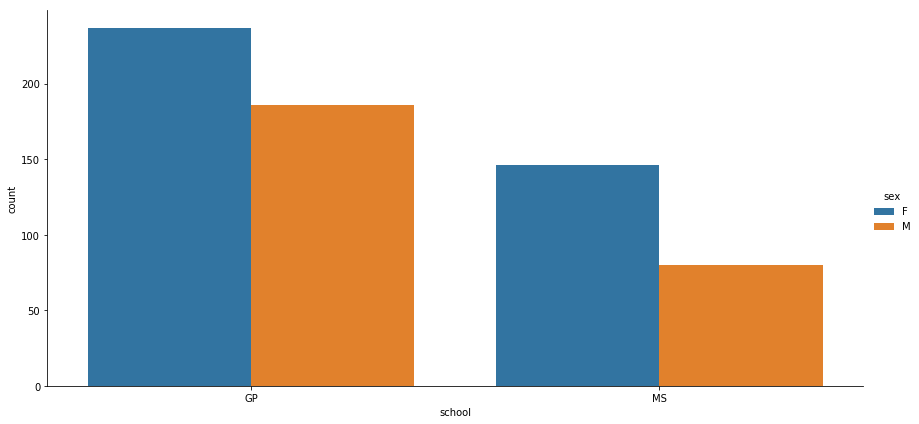

In [12]:
sns.catplot(x='school', hue='sex', data=df, kind='count', height=6, aspect=2)

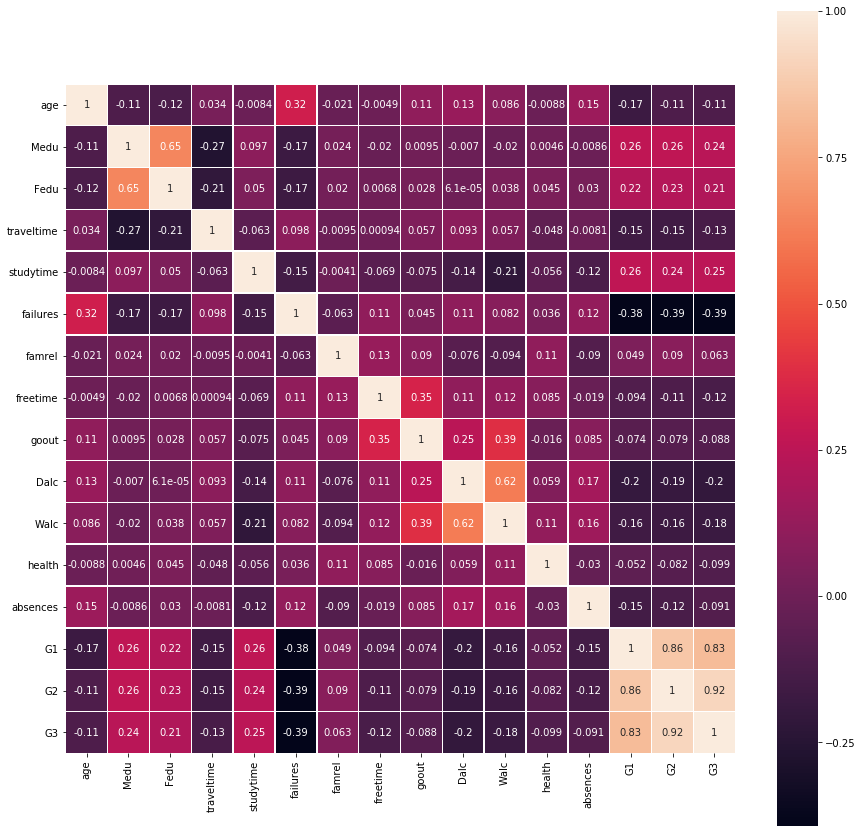

In [11]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(15, 15))
hmap = sns.heatmap(df.corr(), square=True, annot=True, linewidth=0.5)

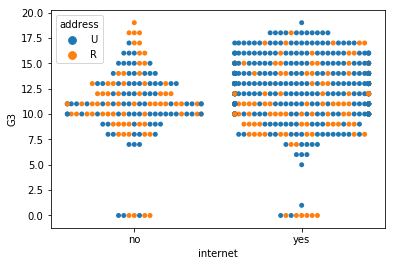

In [13]:
# Verificando a relação entre a disponibilidade de internet e a nota G3,
# separada por área urbana e rural.

sns.swarmplot(x='internet', y='G3', hue='address', data=df)

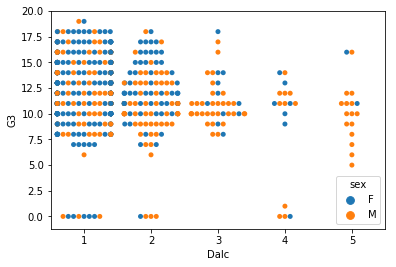

In [14]:
# Verificando a relação entre a disponibilidade de Alcool Semanal e a nota G3,
# separada por genero.

sns.swarmplot(x='Dalc', y='G3', hue='sex', data=df)

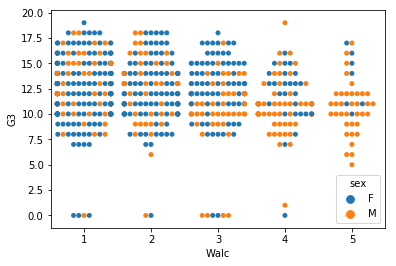

In [15]:
# Verificando a relação entre a disponibilidade de Alcool Fim de Semana e a nota G3,
# separada por genero.

sns.swarmplot(x='Walc', y='G3', hue='sex', data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


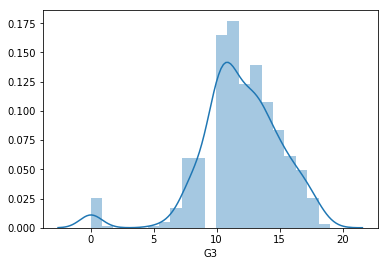

In [21]:
# Distribuição da Nota Final
sns.distplot(df['G3'], kde=True)

# Transformando os Dados

In [25]:
# Modificando o tipo escola

df.loc[df['school'] == 'GP', 'school'] = 1
df.loc[df['school'] == 'MS', 'school'] = 0

In [29]:
df['school'].value_counts()

1    423
0    226
Name: school, dtype: int64

In [30]:
# Modificando o tipo escola

df.loc[df['sex'] == 'M', 'sex'] = 1
df.loc[df['sex'] == 'F', 'sex'] = 0

# Modificando o endereço

df.loc[df['address'] == 'U', 'address'] = 1
df.loc[df['address'] == 'R', 'address'] = 0

# Modificando o famsize

df.loc[df['famsize'] == 'GT3', 'famsize'] = 1
df.loc[df['famsize'] == 'LE3', 'famsize'] = 0

# Modificando o Pstatus

df.loc[df['Pstatus'] == 'T', 'Pstatus'] = 1
df.loc[df['Pstatus'] == 'A', 'Pstatus'] = 0



In [31]:
# Transformando as variáveis yes/no

for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
           'romantic']:
    df[col] = df[col].map({'yes': 1, 'no': 0})



In [32]:
# Transformando as variáveis categóricas
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null int64
sex           649 non-null int64
age           649 non-null int64
address       649 non-null int64
famsize       649 non-null int64
Pstatus       649 non-null int64
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null int8
Fjob          649 non-null int8
reason        649 non-null int8
guardian      649 non-null int8
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null int64
famsup        649 non-null int64
paid          649 non-null int64
activities    649 non-null int64
nursery       649 non-null int64
higher        649 non-null int64
internet      649 non-null int64
romantic      649 non-null int64
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc    

In [34]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,1,0,17,1,1,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,1,0,15,1,0,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,1,0,15,1,1,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,1,0,16,1,1,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


# Rodando a Regressão Linear

In [35]:
# Criar conjuntos de treino e teste

# Importando a função do sklearn
from sklearn.model_selection import train_test_split

# Separar os dados com 20% para teste e usando uma semente aleatória
# para podermos replicar o resultado
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [36]:
# Verificando o tamanho
train.shape, test.shape

((519, 33), (130, 33))

In [39]:
# Listar colunas que não serão usadas
remove = ['G1', 'G2', 'G3']

# Lista das caracteristicas para o modelo
feats = [col for col in train.columns if col not in remove]


In [40]:
# Criando o modelo de regressão linear
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [41]:
# treinar o modelo
regr.fit(X=train[feats], y=train['G3'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# Gerar as predições
preds = regr.predict(X=test[feats])

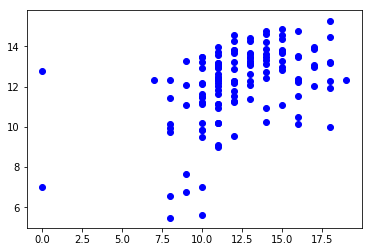

In [60]:
plt.scatter(test['G3'], preds, color='blue')
#plt.plot(preds, test['G3'], color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())

plt.show()

In [50]:
from sklearn.metrics import r2_score
r2_score(test['G3'], preds)

0.1718582444823583

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['G3'], preds)

8.075803187948486

![Faustao](https://media.tenor.com/images/0c73a1e663523b22f1b90a46c2eb514a/tenor.gif)